In [1]:
from sqlalchemy import create_engine
import pandas as pd

In [2]:
username="postgres"
password="postgres "
host="localhost"
port=5432
dbpath=f'postgresql://{username}:{password}@{host}:{port}/employee' 
engine=create_engine(dbpath)

In [3]:
employee=pd.read_sql('SELECT* FROM employees',engine)
salary=pd.read_sql('SELECT* FROM salaries',engine)
title=pd.read_sql('SELECT* FROM titles',engine)

In [4]:
joinsalarydata=pd.read_sql("SELECT employees.emp_no,salaries.salary from employees inner join salaries on employees.emp_no=salaries.emp_no",engine)

In [5]:
joinsalarydata.sort_values(by="salary")

,emp_no,salary
150011,11683,40000
148640,490441,40000
148637,490429,40000
148634,490407,40000
148633,490402,40000
...,...,...
40989,37558,125469
219805,458302,126703
180490,444756,127041
229255,44188,127238


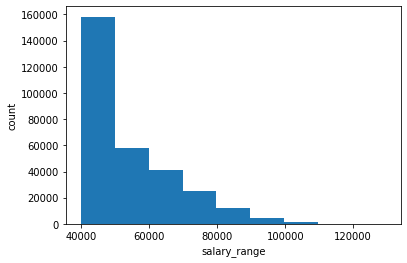

In [7]:
import matplotlib.pyplot as plt
bin=9
plt.hist(joinsalarydata.salary,bins=bin)
plt.xlabel("salary_range")
plt.ylabel("count")
plt.show()

In [8]:
jointitledata=pd.read_sql("SELECT titles.title,salaries.salary from titles inner join salaries on titles.emp_no=salaries.emp_no",engine)

In [9]:
dt=pd.DataFrame(jointitledata)

In [10]:
dt.groupby(dt.title).mean()

,salary
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614
Staff,58465.271904
Technique Leader,48580.505772
